In [1]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
from keras.applications.vgg16 import VGG16


In [2]:
img_height = 48
img_width = 48

In [3]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory='train/',
    #validation_split=0.2,
    #subset="training",
    seed=123,
    batch_size=32,
    image_size=(48, 48),
    color_mode='grayscale')

test_dataset = keras.utils.image_dataset_from_directory(
    directory='test/',
    #validation_split=0.2,
    #subset="validation",
    seed=123,
    batch_size=32,
    image_size=(48, 48),
    shuffle=False,
    color_mode='grayscale')
    
classes = train_dataset.class_names
no_of_classes = len(classes)
    

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [14]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #ayers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dense(no_of_classes,activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)      

In [17]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10
898/898 [==============================] - 978s 1s/step - loss: 1.9190 - accuracy: 0.2533 - val_loss: 1.6928 - val_accuracy: 0.3123
Epoch 2/10
898/898 [==============================] - 986s 1s/step - loss: 1.6796 - accuracy: 0.3310 - val_loss: 1.5799 - val_accuracy: 0.3865
Epoch 3/10
898/898 [==============================] - 842s 938ms/step - loss: 1.5877 - accuracy: 0.3744 - val_loss: 1.5047 - val_accuracy: 0.4224
Epoch 4/10
898/898 [==============================] - 788s 877ms/step - loss: 1.5045 - accuracy: 0.4123 - val_loss: 1.4495 - val_accuracy: 0.4386
Epoch 5/10
898/898 [==============================] - 751s 837ms/step - loss: 1.4434 - accuracy: 0.4386 - val_loss: 1.4230 - val_accuracy: 0.4508
Epoch 6/10
898/898 [==============================] - 742s 826ms/step - loss: 1.3898 - accuracy: 0.4617 - val_loss: 1.3622 - val_accuracy: 0.4731
Epoch 7/10
898/898 [==============================] - 742s 826ms/step - loss: 1.3467 - accuracy: 0.4810 - val_loss: 1.3368 - val_a

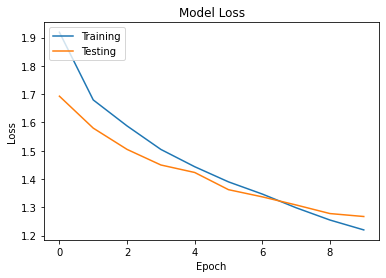

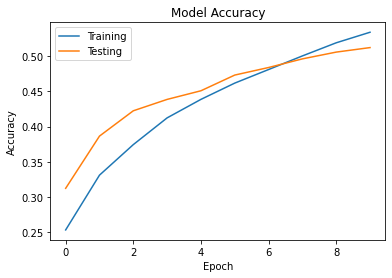

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

In [22]:
import os
from keras.preprocessing import image
import numpy as np

path = os.getcwd()
testfolder_path = path + '/EMOTOR_TEST'

images = []
files = []
predictions = []
for img in os.listdir(testfolder_path):
    print(img)
    files.append(img)
    img = os.path.join(testfolder_path, img)
    img = image.load_img(img, target_size=(48,48),color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    predictions.append(classes[np.argmax(model.predict(img))])
    
#images = np.vstack(images)


10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
10020.jpg
10021.jpg
10022.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10036.jpg
10037.jpg
10038.jpg
10039.jpg
10040.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10089.jpg
10090.jpg
10091.jpg
10092.jpg
10093.jpg
10094.jpg
10095.jpg
10096.jpg
10097.jpg
10098.jpg
10099.jpg


10821.jpg
10822.jpg
10823.jpg
10824.jpg
10825.jpg
10826.jpg
10827.jpg
10828.jpg
10829.jpg
10830.jpg
10831.jpg
10832.jpg
10833.jpg
10834.jpg
10835.jpg
10836.jpg
10837.jpg
10838.jpg
10839.jpg
10840.jpg
10841.jpg
10842.jpg
10843.jpg
10844.jpg
10845.jpg
10846.jpg
10847.jpg
10848.jpg
10849.jpg
10850.jpg
10851.jpg
10852.jpg
10853.jpg
10854.jpg
10855.jpg
10856.jpg
10857.jpg
10858.jpg
10859.jpg
10860.jpg
10861.jpg
10862.jpg
10863.jpg
10864.jpg
10865.jpg
10866.jpg
10867.jpg
10868.jpg
10869.jpg
10870.jpg
10871.jpg
10872.jpg
10873.jpg
10874.jpg
10875.jpg
10876.jpg
10877.jpg
10878.jpg
10879.jpg
10880.jpg
10881.jpg
10882.jpg
10883.jpg
10884.jpg
10885.jpg
10886.jpg
10887.jpg
10888.jpg
10889.jpg
10890.jpg
10891.jpg
10892.jpg
10893.jpg
10894.jpg
10895.jpg
10896.jpg
10897.jpg
10898.jpg
10899.jpg
10900.jpg
10901.jpg
10902.jpg
10903.jpg
10904.jpg
10905.jpg
10906.jpg
10907.jpg
10908.jpg
10909.jpg
10910.jpg
10911.jpg
10912.jpg
10913.jpg
10914.jpg
10915.jpg
10916.jpg
10917.jpg
10918.jpg
10919.jpg
10920.jpg


11643.jpg
11644.jpg
11645.jpg
11646.jpg
11647.jpg
11648.jpg
11649.jpg
11650.jpg
11651.jpg
11652.jpg
11653.jpg
11654.jpg
11655.jpg
11656.jpg
11657.jpg
11658.jpg
11659.jpg
11660.jpg
11661.jpg
11662.jpg
11663.jpg
11664.jpg
11665.jpg
11666.jpg
11667.jpg
11668.jpg
11669.jpg
11670.jpg
11671.jpg
11672.jpg
11673.jpg
11674.jpg
11675.jpg
11676.jpg
11677.jpg
11678.jpg
11679.jpg
11680.jpg
11681.jpg
11682.jpg
11683.jpg
11684.jpg
11685.jpg
11686.jpg
11687.jpg
11688.jpg
11689.jpg
11690.jpg
11691.jpg
11692.jpg
11693.jpg
11694.jpg
11695.jpg
11696.jpg
11697.jpg
11698.jpg
11699.jpg
11700.jpg
11701.jpg
11702.jpg
11703.jpg
11704.jpg
11705.jpg
11706.jpg
11707.jpg
11708.jpg
11709.jpg
11710.jpg
11711.jpg
11712.jpg
11713.jpg
11714.jpg
11715.jpg
11716.jpg
11717.jpg
11718.jpg
11719.jpg
11720.jpg
11721.jpg
11722.jpg
11723.jpg
11724.jpg
11725.jpg
11726.jpg
11727.jpg
11728.jpg
11729.jpg
11730.jpg
11731.jpg
11732.jpg
11733.jpg
11734.jpg
11735.jpg
11736.jpg
11737.jpg
11738.jpg
11739.jpg
11740.jpg
11741.jpg
11742.jpg


12464.jpg
12465.jpg
12466.jpg
12467.jpg
12468.jpg
12469.jpg
12470.jpg
12471.jpg
12472.jpg
12473.jpg
12474.jpg
12475.jpg
12476.jpg
12477.jpg
12478.jpg
12479.jpg
12480.jpg
12481.jpg
12482.jpg
12483.jpg
12484.jpg
12485.jpg
12486.jpg
12487.jpg
12488.jpg
12489.jpg
12490.jpg
12491.jpg
12492.jpg
12493.jpg
12494.jpg
12495.jpg
12496.jpg
12497.jpg
12498.jpg
12499.jpg
12500.jpg
12501.jpg
12502.jpg
12503.jpg
12504.jpg
12505.jpg
12506.jpg
12507.jpg
12508.jpg
12509.jpg
12510.jpg
12511.jpg
12512.jpg
12513.jpg
12514.jpg
12515.jpg
12516.jpg
12517.jpg
12518.jpg
12519.jpg
12520.jpg
12521.jpg
12522.jpg
12523.jpg
12524.jpg
12525.jpg
12526.jpg
12527.jpg
12528.jpg
12529.jpg
12530.jpg
12531.jpg
12532.jpg
12533.jpg
12534.jpg
12535.jpg
12536.jpg
12537.jpg
12538.jpg
12539.jpg
12540.jpg
12541.jpg
12542.jpg
12543.jpg
12544.jpg
12545.jpg
12546.jpg
12547.jpg
12548.jpg
12549.jpg
12550.jpg
12551.jpg
12552.jpg
12553.jpg
12554.jpg
12555.jpg
12556.jpg
12557.jpg
12558.jpg
12559.jpg
12560.jpg
12561.jpg
12562.jpg
12563.jpg


13284.jpg
13285.jpg
13286.jpg
13287.jpg
13288.jpg
13289.jpg
13290.jpg
13291.jpg
13292.jpg
13293.jpg
13294.jpg
13295.jpg
13296.jpg
13297.jpg
13298.jpg
13299.jpg
13300.jpg
13301.jpg
13302.jpg
13303.jpg
13304.jpg
13305.jpg
13306.jpg
13307.jpg
13308.jpg
13309.jpg
13310.jpg
13311.jpg
13312.jpg
13313.jpg
13314.jpg
13315.jpg
13316.jpg
13317.jpg
13318.jpg
13319.jpg
13320.jpg
13321.jpg
13322.jpg
13323.jpg
13324.jpg
13325.jpg
13326.jpg
13327.jpg
13328.jpg
13329.jpg
13330.jpg
13331.jpg
13332.jpg
13333.jpg
13334.jpg
13335.jpg
13336.jpg
13337.jpg
13338.jpg
13339.jpg
13340.jpg
13341.jpg
13342.jpg
13343.jpg
13344.jpg
13345.jpg
13346.jpg
13347.jpg
13348.jpg
13349.jpg
13350.jpg
13351.jpg
13352.jpg
13353.jpg
13354.jpg
13355.jpg
13356.jpg
13357.jpg
13358.jpg
13359.jpg
13360.jpg
13361.jpg
13362.jpg
13363.jpg
13364.jpg
13365.jpg
13366.jpg
13367.jpg
13368.jpg
13369.jpg
13370.jpg
13371.jpg
13372.jpg
13373.jpg
13374.jpg
13375.jpg
13376.jpg
13377.jpg
13378.jpg
13379.jpg
13380.jpg
13381.jpg
13382.jpg
13383.jpg


14106.jpg
14107.jpg
14108.jpg
14109.jpg
14110.jpg
14111.jpg
14112.jpg
14113.jpg
14114.jpg
14115.jpg
14116.jpg
14117.jpg
14118.jpg
14119.jpg
14120.jpg
14121.jpg
14122.jpg
14123.jpg
14124.jpg
14125.jpg
14126.jpg
14127.jpg
14128.jpg
14129.jpg
14130.jpg
14131.jpg
14132.jpg
14133.jpg
14134.jpg
14135.jpg
14136.jpg
14137.jpg
14138.jpg
14139.jpg
14140.jpg
14141.jpg
14142.jpg
14143.jpg
14144.jpg
14145.jpg
14146.jpg
14147.jpg
14148.jpg
14149.jpg
14150.jpg
14151.jpg
14152.jpg
14153.jpg
14154.jpg
14155.jpg
14156.jpg
14157.jpg
14158.jpg
14159.jpg
14160.jpg
14161.jpg
14162.jpg
14163.jpg
14164.jpg
14165.jpg
14166.jpg
14167.jpg
14168.jpg
14169.jpg
14170.jpg
14171.jpg
14172.jpg
14173.jpg
14174.jpg
14175.jpg
14176.jpg
14177.jpg
14178.jpg
14179.jpg
14180.jpg
14181.jpg
14182.jpg
14183.jpg
14184.jpg
14185.jpg
14186.jpg
14187.jpg
14188.jpg
14189.jpg
14190.jpg
14191.jpg
14192.jpg
14193.jpg
14194.jpg
14195.jpg
14196.jpg
14197.jpg
14198.jpg
14199.jpg
14200.jpg
14201.jpg
14202.jpg
14203.jpg
14204.jpg
14205.jpg


14927.jpg
14928.jpg
14929.jpg
14930.jpg
14931.jpg
14932.jpg
14933.jpg
14934.jpg
14935.jpg
14936.jpg
14937.jpg
14938.jpg
14939.jpg
14940.jpg
14941.jpg
14942.jpg
14943.jpg
14944.jpg
14945.jpg
14946.jpg
14947.jpg
14948.jpg
14949.jpg
14950.jpg
14951.jpg
14952.jpg
14953.jpg
14954.jpg
14955.jpg
14956.jpg
14957.jpg
14958.jpg
14959.jpg
14960.jpg
14961.jpg
14962.jpg
14963.jpg
14964.jpg
14965.jpg
14966.jpg
14967.jpg
14968.jpg
14969.jpg
14970.jpg
14971.jpg
14972.jpg
14973.jpg
14974.jpg
14975.jpg
14976.jpg
14977.jpg
14978.jpg
14979.jpg
14980.jpg
14981.jpg
14982.jpg
14983.jpg
14984.jpg
14985.jpg
14986.jpg
14987.jpg
14988.jpg
14989.jpg
14990.jpg
14991.jpg
14992.jpg
14993.jpg
14994.jpg
14995.jpg
14996.jpg
14997.jpg
14998.jpg
14999.jpg
15000.jpg
15001.jpg
15002.jpg
15003.jpg
15004.jpg
15005.jpg
15006.jpg
15007.jpg
15008.jpg
15009.jpg
15010.jpg
15011.jpg
15012.jpg
15013.jpg
15014.jpg
15015.jpg
15016.jpg
15017.jpg
15018.jpg
15019.jpg
15020.jpg
15021.jpg
15022.jpg
15023.jpg
15024.jpg
15025.jpg
15026.jpg


15748.jpg
15749.jpg
15750.jpg
15751.jpg
15752.jpg
15753.jpg
15754.jpg
15755.jpg
15756.jpg
15757.jpg
15758.jpg
15759.jpg
15760.jpg
15761.jpg
15762.jpg
15763.jpg
15764.jpg
15765.jpg
15766.jpg
15767.jpg
15768.jpg
15769.jpg
15770.jpg
15771.jpg
15772.jpg
15773.jpg
15774.jpg
15775.jpg
15776.jpg
15777.jpg
15778.jpg
15779.jpg
15780.jpg
15781.jpg
15782.jpg
15783.jpg
15784.jpg
15785.jpg
15786.jpg
15787.jpg
15788.jpg
15789.jpg
15790.jpg
15791.jpg
15792.jpg
15793.jpg
15794.jpg
15795.jpg
15796.jpg
15797.jpg
15798.jpg
15799.jpg
15800.jpg
15801.jpg
15802.jpg
15803.jpg
15804.jpg
15805.jpg
15806.jpg
15807.jpg
15808.jpg
15809.jpg
15810.jpg
15811.jpg
15812.jpg
15813.jpg
15814.jpg
15815.jpg
15816.jpg
15817.jpg
15818.jpg
15819.jpg
15820.jpg
15821.jpg
15822.jpg
15823.jpg
15824.jpg
15825.jpg
15826.jpg
15827.jpg
15828.jpg
15829.jpg
15830.jpg
15831.jpg
15832.jpg
15833.jpg
15834.jpg
15835.jpg
15836.jpg
15837.jpg
15838.jpg
15839.jpg
15840.jpg
15841.jpg
15842.jpg
15843.jpg
15844.jpg
15845.jpg
15846.jpg
15847.jpg


16568.jpg
16569.jpg
16570.jpg
16571.jpg
16572.jpg
16573.jpg
16574.jpg
16575.jpg
16576.jpg
16577.jpg
16578.jpg
16579.jpg
16580.jpg
16581.jpg
16582.jpg
16583.jpg
16584.jpg
16585.jpg
16586.jpg
16587.jpg
16588.jpg
16589.jpg
16590.jpg
16591.jpg
16592.jpg
16593.jpg
16594.jpg
16595.jpg
16596.jpg
16597.jpg
16598.jpg
16599.jpg
16600.jpg
16601.jpg
16602.jpg
16603.jpg
16604.jpg
16605.jpg
16606.jpg
16607.jpg
16608.jpg
16609.jpg
16610.jpg
16611.jpg
16612.jpg
16613.jpg
16614.jpg
16615.jpg
16616.jpg
16617.jpg
16618.jpg
16619.jpg
16620.jpg
16621.jpg
16622.jpg
16623.jpg
16624.jpg
16625.jpg
16626.jpg
16627.jpg
16628.jpg
16629.jpg
16630.jpg
16631.jpg
16632.jpg
16633.jpg
16634.jpg
16635.jpg
16636.jpg
16637.jpg
16638.jpg
16639.jpg
16640.jpg
16641.jpg
16642.jpg
16643.jpg
16644.jpg
16645.jpg
16646.jpg
16647.jpg
16648.jpg
16649.jpg
16650.jpg
16651.jpg
16652.jpg
16653.jpg
16654.jpg
16655.jpg
16656.jpg
16657.jpg
16658.jpg
16659.jpg
16660.jpg
16661.jpg
16662.jpg
16663.jpg
16664.jpg
16665.jpg
16666.jpg
16667.jpg


In [25]:
import pandas as pd

df = pd.DataFrame({'img_name':files})
df['label'] = predictions

df.to_csv("predictions.csv",index=False)

In [26]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
 json_file.write(model_json)
 model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
